In [ ]:
import stanza
stanza.download('id')
nlp = stanza.Pipeline(lang='id', processors='tokenize, pos')

In [10]:
# tes
text = "Ilmu biologi yang membutuhkan penggunaan mikroskop untuk mengkaji, sebagai contoh"
doc = nlp(text)
for sentence in doc.sentences:
  for word in sentence.words:
    print(f"{word.text}\t{word.xpos}")

Ilmu	NSD
biologi	NSD
yang	S--
membutuhkan	VSA
penggunaan	NSD
mikroskop	X--
untuk	R--
mengkaji	VSA
,	Z--
sebagai	R--
contoh	NSD


In [26]:
# read dataset
import pandas as pd
df = pd.read_csv("../output/normalisasi-dataset-level-soal-2.csv")
df.head(1)

,soal,version-soal,opsi-1,opsi-2,opsi-3,opsi-4,opsi-5,opsi-benar,total-benar,total-salah,total-muncul,prob-benar,level-soal,current-total-benar,current-total-muncul,current-prob,current-level
0,Bagian dari bidang biologi yang membutuhkan pe...,001v001,Atom dan molekul,"Organel, sel dan jaringan",Bioma dan biosfer,Membran sel,Organ dan sistem organ,2,3,3,6,0.5,2,0,9,0.2,3


In [25]:
# implement pos-tag
def get_pos_tags(text):
    doc = nlp(text)   
    pos_tags = [f"{word.text}/{word.xpos}" for sent in doc.sentences for word in sent.words] 
    return " ".join(pos_tags)

df["pos"] = df["soal"].apply(get_pos_tags)
data_with_pos = df[["soal", "pos", "version-soal", "current-prob", "current-level"]]
data_with_pos.head(1)


,soal,pos,version-soal,current-prob,current-level
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.2,3


In [33]:
# hitung jumlah kata kerja dan kata hubungn
def hitung_kata_kerja_dan_hubung(pos_text):
  words = pos_text.split()
  kata_kerja = sum(1 for word in words if "/V" in word)
  kata_hubung = sum(1 for word in words if any(tag in word for tag in ["/R", "/S", "/C"]))
  return kata_kerja, kata_hubung

data_with_pos[["kata-kerja", "kata-hubung"]] = data_with_pos["pos"].apply(lambda x: pd.Series(hitung_kata_kerja_dan_hubung(x)))
data_with_pos.head(1)

,soal,pos,version-soal,current-prob,current-level,kata-kerja,kata-hubung
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.2,3,1,3


In [35]:
# hitung total kata tiap soal
data_with_pos["jumlah-kata"] = data_with_pos["soal"].apply(lambda x: len(str(x).split()))
data_with_pos.head(1)

,soal,pos,version-soal,current-prob,current-level,kata-kerja,kata-hubung,jumlah-kata
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.2,3,1,3,10


In [36]:
# hitung rasio kata kerja dan kata hubung dengan total kata tiap soal
data_with_pos["rasio-verb"] = data_with_pos["kata-kerja"] / data_with_pos["jumlah-kata"]
data_with_pos["rasio-conj"] = data_with_pos["kata-hubung"] / data_with_pos["jumlah-kata"]
data_with_pos.head(1)

,soal,pos,version-soal,current-prob,current-level,kata-kerja,kata-hubung,jumlah-kata,rasio-verb,rasio-conj
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.2,3,1,3,10,0.1,0.3


In [48]:
# lihat korelasi kompleksitas kalimat berdasarkan level soal
corr_verbs = data_with_pos[["rasio-verb", "current-level"]].corr().iloc[0, 1]
corr_conj = data_with_pos[["rasio-conj",  "current-level"]].corr().iloc[0, 1]

print(f"Korelasi antara rasio kata kerja dan level soal  : {corr_verbs}")
print(f"Korelasi antara rasio kata hubung dan level soal : {corr_conj}")

Korelasi antara rasio kata kerja dan level soal  : -0.04090883220918993
Korelasi antara rasio kata hubung dan level soal : 0.05756569809901119


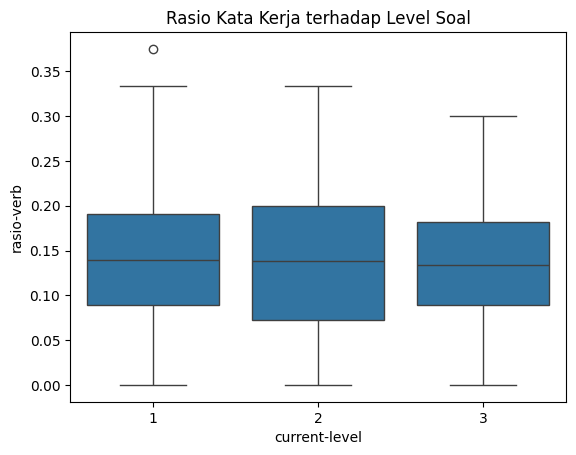

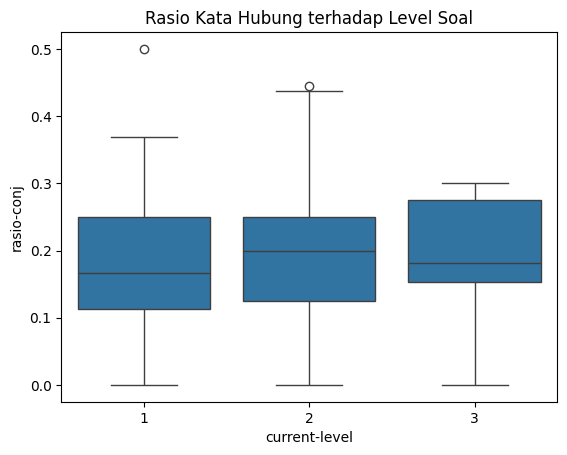

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data_with_pos, x="current-level", y="rasio-verb")
plt.title("Rasio Kata Kerja terhadap Level Soal")
plt.show()

sns.boxplot(data=data_with_pos, x="current-level", y="rasio-conj")
plt.title("Rasio Kata Hubung terhadap Level Soal")
plt.show()


In [42]:
# lihat dari sisi kompleksitas soal
data_with_pos["jumlah-kompleksitas"] = data_with_pos["kata-kerja"] + data_with_pos["kata-hubung"]
data_with_pos["rasio-kompleksitas"] = data_with_pos["jumlah-kompleksitas"] / data_with_pos["jumlah-kata"]
corr_kompleksitas = data_with_pos[["current-level", "rasio-kompleksitas"]].corr().iloc[0, 1]
print(f"Korelasi rasio kompleksitas terhadap level soal: {corr_kompleksitas}")


Korelasi rasio kompleksitas terhadap level soal: 0.017460432423793627


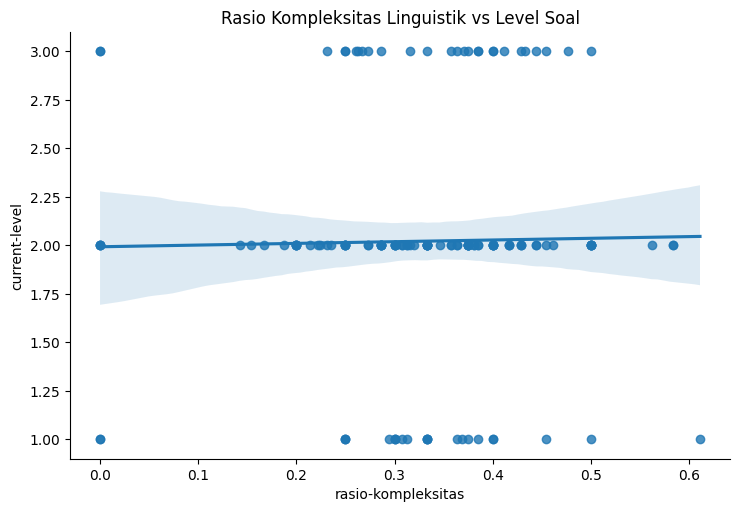

In [46]:
sns.lmplot(data=data_with_pos, x="rasio-kompleksitas", y="current-level", aspect=1.5)
plt.title("Rasio Kompleksitas Linguistik vs Level Soal")
plt.show()

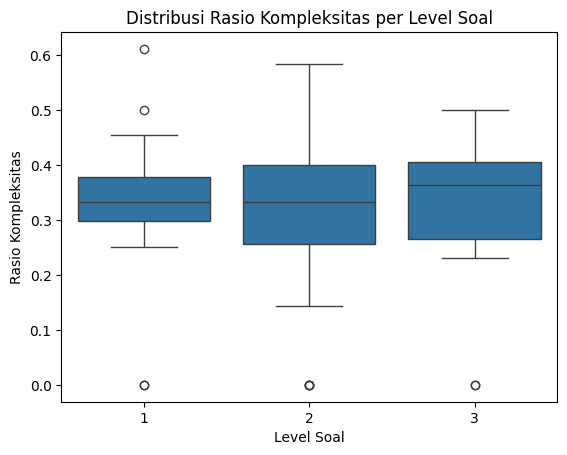

In [44]:
sns.boxplot(data=data_with_pos, x="current-level", y="rasio-kompleksitas")
plt.title("Distribusi Rasio Kompleksitas per Level Soal")
plt.xlabel("Level Soal")
plt.ylabel("Rasio Kompleksitas")
plt.show()

In [49]:
data_with_pos.head(1)

,soal,pos,version-soal,current-prob,current-level,kata-kerja,kata-hubung,jumlah-kata,rasio-verb,rasio-conj,jumlah-kompleksitas,rasio-kompleksitas
0,Bagian dari bidang biologi yang membutuhkan pe...,Bagian/NSD dari/R-- bidang/NSD biologi/NSD yan...,001v001,0.2,3,1,3,10,0.1,0.3,4,0.4
